In [2]:
import importlib
import numpy as np
import math
import random
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

In [3]:
particles=[]
L=5.31329
d=1
N=60

In [4]:
particles=[np.array([random.uniform(0,1)*L,random.uniform(0,1)*L,random.uniform(0,1)*L]) for i in range(0,N)]

In [5]:
def V(r,rc):
    d=1
    eps=0.5
    if (r<d) :
        a=10000
    elif (r>=d and r<rc) : 
        a=-eps*((d**6)/(r**6) - (d**6)/(rc**6))
    elif (r>=rc) :
        a=0
    return a

In [6]:
def Ve(r,rc):
    d=1
    eps=0.5
    if (r<d) :
        a=10000
    elif (r>=d and r<rc) : 
        a=-eps*((d**6)/(r**6))
    elif (r>=rc) :
        a=0
    return a

In [7]:
def D(p1,p2):
    dx=p1[0]-p2[0] 
    dx=dx-L*round(dx/L)
    
    dy=p1[1]-p2[1] 
    dy=dy-L*round(dy/L)
    
    dz=p1[2]-p2[2] 
    dz=dz-L*round(dz/L)
    
    D=(dx**2+dy**2+dz**2)**0.5
    
    return D

In [8]:
def distanze(particles):
    distanze=[]

    for i in range (0,N):
        for j in range (i,N):
            if (i!=j):
                distanze.append(D(particles[i],particles[j]))
    return distanze

def E(particles,rc,dist):
    #dist=distanze(particles)
    E=0
    for i in range(0,int(N*(N-1)/2)):
        r=dist[i]
        E+=V(r,rc)
    return E

def Ee(particles,rc,dist):
    #dist=distanze(particles)
    Ee=0
    for i in range(0,int(N*(N-1)/2)):
        r=dist[i]
        Ee+=Ve(r,rc)
    return -Ee

def viriale(dist,rc):
    a=0
    for i in range(0,len(dist)):
        a+=dist[i]*Vder(dist[i],rc)
    return a

In [9]:
import math
def update (particles,delta,rc):
    #aggiorno=np.[0,0,0]
    acc=0
    
    for i in range(0,N):
        partnew=np.zeros(3)
        E0=0
        E=0
        #print("**********", i)
        partnew[0]=particles[i][0]+(random.random()-0.5)*delta
        partnew[1]=particles[i][1]+(random.random()-0.5)*delta
        partnew[2]=particles[i][2]+(random.random()-0.5)*delta
        #print(partnew)
        for j in range(0,N):
            if i!=j:
                E0+=V(D(particles[i],particles[j]),rc)
                E+=V(D(partnew,particles[j]),rc)
        #print("e0", E0)
        #print("e", E)
        if (E<E0):
     #aggiorno=partnew
            #particles[i]=partnew
            #print("si",i)
            particles[i]=partnew
            acc+=1
        #return 1
        elif (E>=E0):
            #aggiorno=partnew
            u=random.random()
            DE=E-E0
            l=math.log(u)
            if (l<-DE) :
            #particles[i]=partnew
                #print("sissss",i)
                particles[i]=partnew
                acc+=1
            #return 1
            else:
                particles[i]=particles[i]
                #print("noo", i)
    return acc
        #return 0

In [10]:
dist=distanze(particles)

In [11]:
E(particles,d,dist)

510000

In [12]:
energy=[]
nite=0
while E(particles,d,dist)>0 :
    nite+=1
    b=update(particles,1,d)
    dist=distanze(particles)
    energy.append(E(particles,d,dist))

print(nite)

17


In [13]:
energy

[340000,
 230000,
 200000,
 160000,
 110000,
 60000,
 20000,
 20000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 0]

# START CONF

In [14]:
def volshell(R,dr):
    return (4/3)*math.pi*(((R+dr)**3)-R**3)

def vol(R):
    return (4/3)*math.pi*R**3

# Delta

In [15]:
startconf=particles

accettanza=np.zeros(5)

E_ave=[0,0,0,0,0]

#E_ave[1]=sum(energy)/len(energy)
#E_ave[2]=sum(energy5)/M
#E_ave[3]=sum(energy3)/M
#E_ave[4]=sum(energy4)/M

In [112]:
rc=L/2
M=5000

In [113]:
DEtail=math.pi*0.4/(3*rc**3)

DEtail

0.0223402503232529

*********************************** d/6 ************************************

In [18]:
delta=d/6

In [19]:
energy1=[]

for i in range (0,M):
    accettanza[0]+=update(particles,delta,rc)
    dist=distanze(particles)
    energy1.append(Ee(particles,rc,dist)/N)

In [20]:
accettanza[0]/(N*M)

0.7767

In [21]:
for i in range(0,len(energy1)):
    energy1[i]+=DEtail

E_ave[0]=sum(energy1)/len(energy1)

print(E_ave[0])

0.5722772534312905


In [22]:
c1=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy1[i]-E_ave[0])*(energy1[i+k]-E_ave[0]);
    c1.append(boa/(M-k))

tau1=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c1[j]/c1[0]
    tau1.append(boa+0.5)

<IPython.core.display.Javascript object>


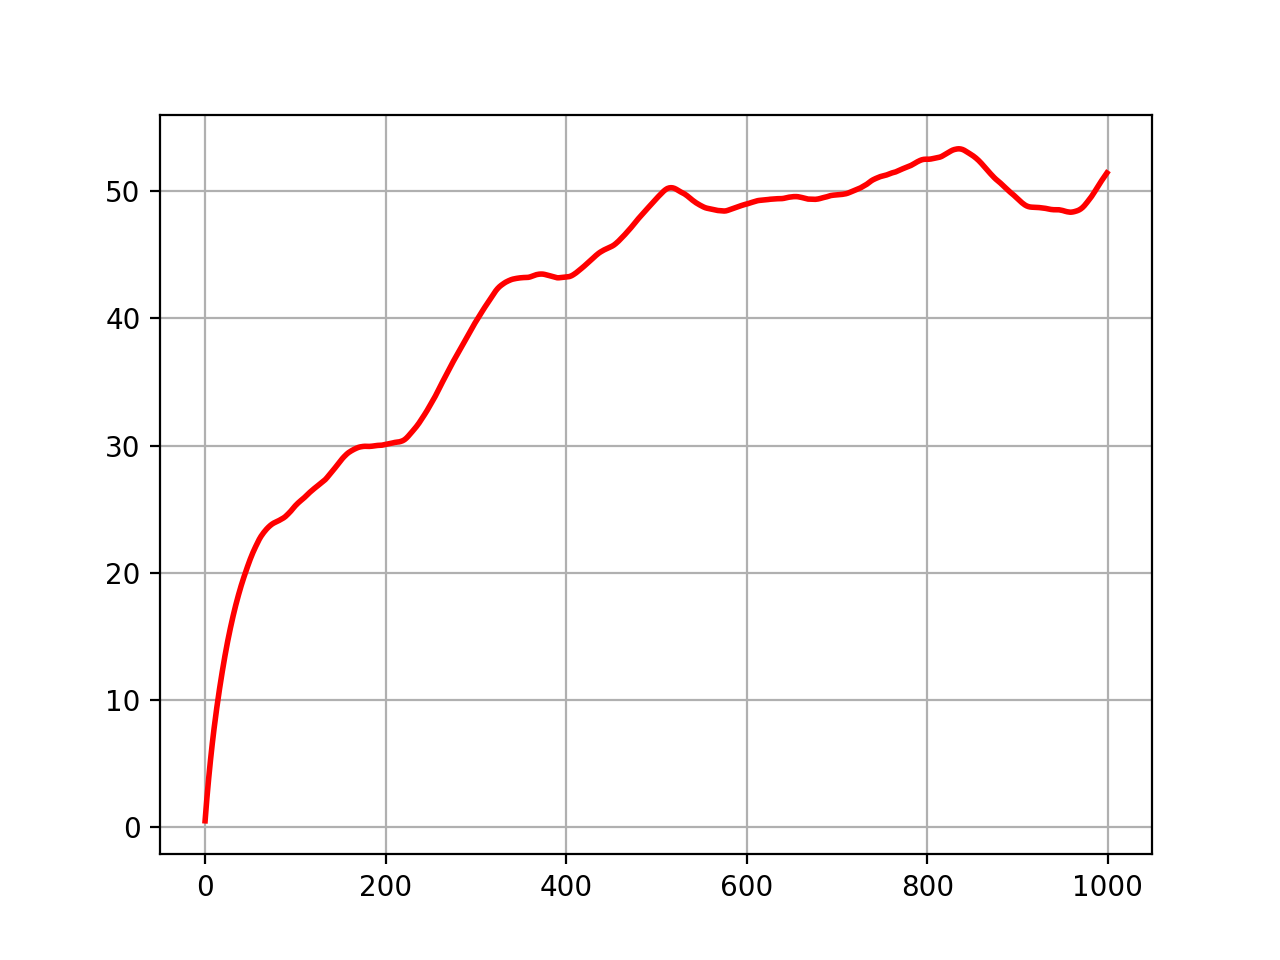

In [25]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau1, lw= 2, color="red")

********d/3********

In [26]:
delta=d/3
accettanza[1]=0

In [27]:
accettanza/(N*M)

array([0.7767, 0.    , 0.    , 0.    , 0.    ])

In [28]:
#dr=d/10
#l=2*int(L/dr)
#Npart=np.zeros(l)

energy2=[]
particles=startconf
for i in range (0,M):
    accettanza[1]+=update(particles,delta,rc)
    dist=distanze(particles)
#    for j in range(0,len(dist)):
#        m=int(dist[j]/dr)
#        Npart[m]+=1
    energy2.append(Ee(particles,rc,dist)/N)

In [100]:
for i in range (0,int(l)):
    Npart[i]/=M

In [101]:
g=np.zeros(50)

for i in range(0,l):
    g[i]=(2/(N*(N-1)))*((L**3)/volshell(i*dr,dr))*Npart[i]

IndexError: index 50 is out of bounds for axis 0 with size 50

<IPython.core.display.Javascript object>


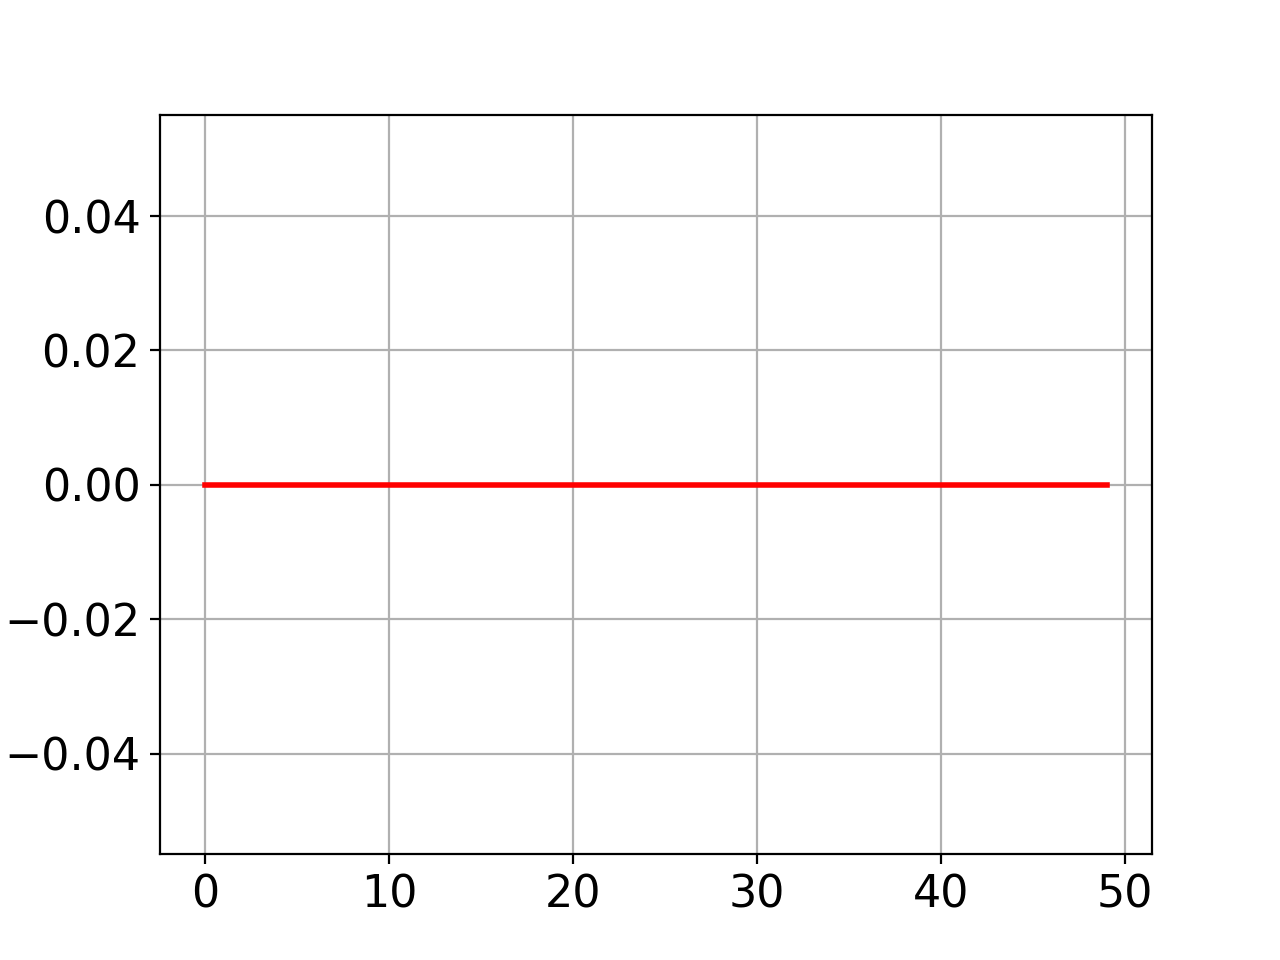

In [102]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(g, lw= 2, color="red")

In [29]:
accettanza[1]/(N*M)

0.6218466666666667

0.6205566666666666 acccc

In [30]:
for i in range(0,len(energy2)):
    energy2[i]+=DEtail

E_ave[1]=sum(energy2)/len(energy2)

print(E_ave[1])

0.5747276059324605


In [31]:
c2=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy2[i]-E_ave[1])*(energy2[i+k]-E_ave[1]);
    c2.append(boa/(M-k))

tau2=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c2[j]/c2[0]
    tau2.append(boa+0.5)

<IPython.core.display.Javascript object>


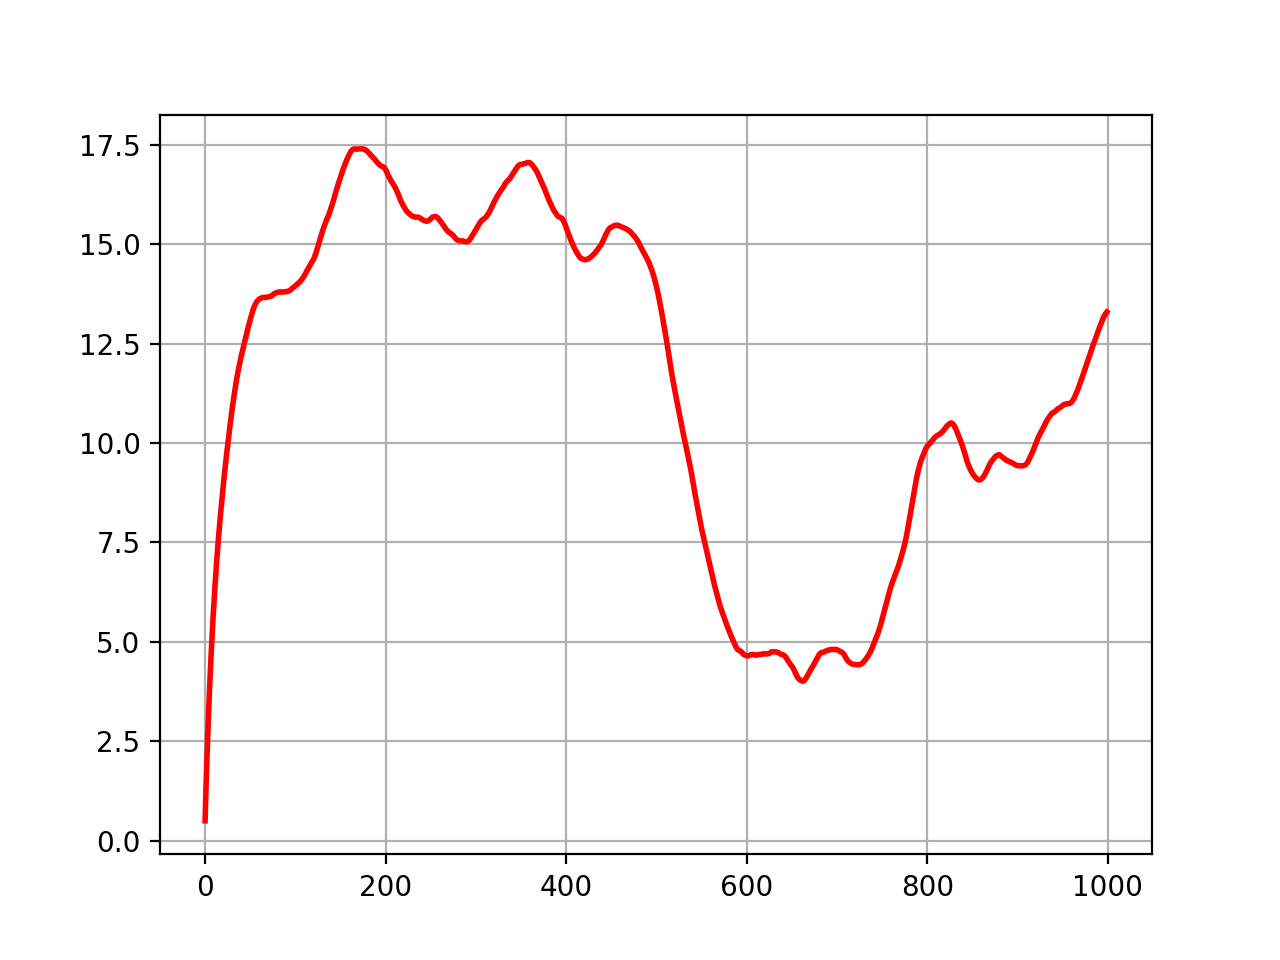

In [33]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau2, lw= 2, color="red")

********d******

In [154]:
rc=L/2
def Vder(r,rc):
    d=1
    eps=0.5
    if (r<d) :
        a=0
    elif (r>=d and r<rc) : 
        a=6*eps*((d**6)/(r**7))
    elif (r>=rc) :
        a=0
    return a

In [155]:
delta=d

dr=d/10
l=2*int(L/dr)
Npart=np.zeros(l)

energy3=[]
pressure1=[]
particles=startconf
for i in range (0,M):
    boa=0
    accettanza[2]+=update(particles,delta,rc)
    dist=distanze(particles)
    for j in range(0,len(dist)):
        m=int(dist[j]/dr)
        Npart[m]+=1
        #boa+=dist[j]*Vder(dist[j],rc)
    energy3.append(Ee(particles,rc,dist)/N)
    pressure1.append(viriale(dist,rc))

In [156]:
pressure1[0]*0.4/(3*N)

0.4376401261147611

In [1]:
vir=sum(pressure1)*0.4/(3*N)/len(pressure1)

vir

NameError: name 'pressure1' is not defined

In [158]:
for i in range (0,len(pressure1)):
    pressure1[i]*=0.4/(3*N)
pressure1

[0.43764012611476105,
 0.4189493649360017,
 0.42767382776389495,
 0.4079510113820193,
 0.4198668210565126,
 0.4230626090100893,
 0.42053202193321493,
 0.41751801959418466,
 0.4228798833885272,
 0.4334546639765065,
 0.4235255314323168,
 0.41145973420388987,
 0.4414609202856818,
 0.44139304110168737,
 0.42216546367599067,
 0.4366281921665609,
 0.4545820420494146,
 0.4340128629749089,
 0.421610960796799,
 0.4391626152834056,
 0.4388718326334388,
 0.45191843376049445,
 0.45284298438180165,
 0.4385794943390346,
 0.4656438803697205,
 0.46773268064314405,
 0.47600673305024815,
 0.45570826408156134,
 0.4623354059783384,
 0.4810543799189379,
 0.4764435968174541,
 0.47683986182572147,
 0.45697819174402105,
 0.4389190425495739,
 0.4591757266812032,
 0.4616207541466637,
 0.45130410735393844,
 0.48470897484296266,
 0.4731747494071496,
 0.46705560268944,
 0.4488533420072833,
 0.4445076374140969,
 0.44108664700223915,
 0.43712340711796277,
 0.44105773503543594,
 0.4276875926973092,
 0.443220076273316

In [160]:
rho=0.4

p=np.zeros(M)

for i in range(0,M):
    p[i]=rho

p_g=np.zeros(M)

g_d=1.99

for i in range(0,M):
    p_g[i]=(2/3)*math.pi*g_d*rho**2

p_g

array([0.6668554, 0.6668554, 0.6668554, ..., 0.6668554, 0.6668554,
       0.6668554])

In [161]:
eps=0.5
DPtail=-math.pi*(4/3)*(rho**2)*eps/(rc**3)

DPtail

-0.01787220025860232

In [162]:
ptot=p[0]+p_g[0]-vir+DPtail

ptot

0.6068905696500626

In [106]:
Npart

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [103]:
for i in range (0,int(l)):
    Npart[i]*=M

g=np.zeros(80)

for i in range(0,l):
    g[i]=(2/(N*(N-1)))*((L**3)/volshell(i*dr,dr))*Npart[i]

IndexError: index 80 is out of bounds for axis 0 with size 80

<IPython.core.display.Javascript object>


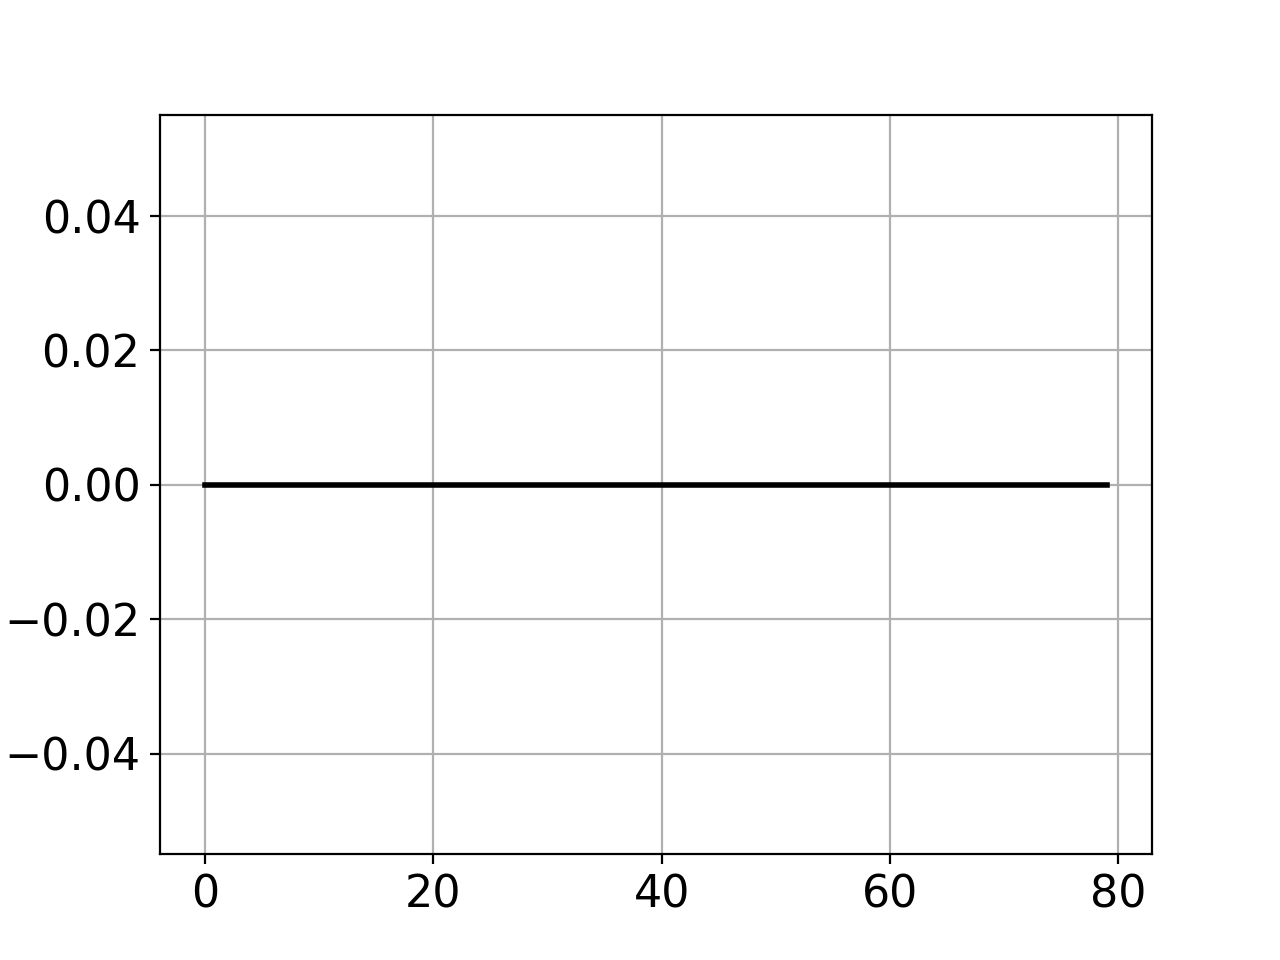

In [105]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(g, lw= 2, color="black")

# errore pressione

<IPython.core.display.Javascript object>


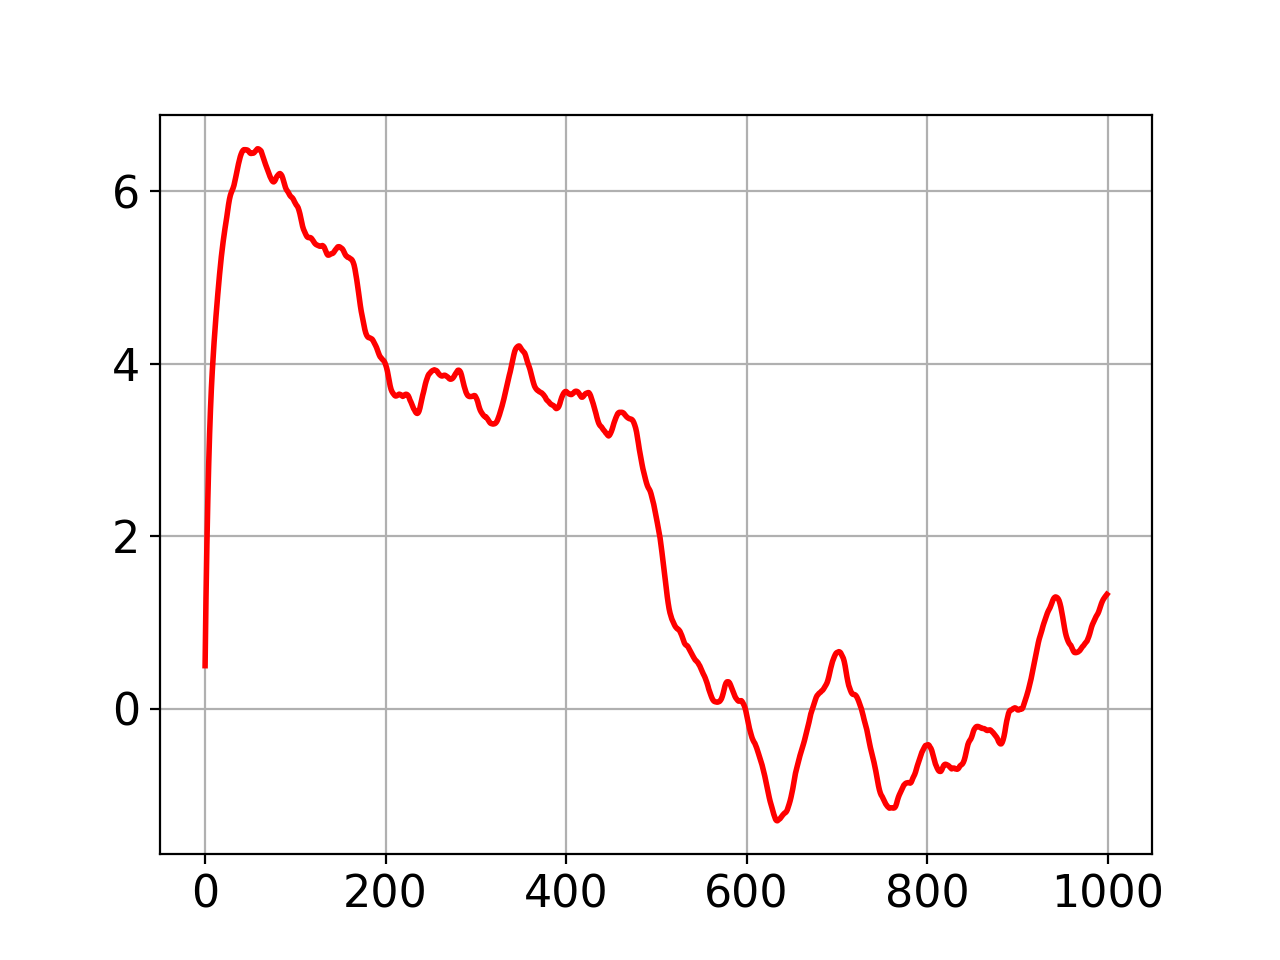

In [147]:
c8=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(pressure1[i]-vir)*(pressure1[i+k]-vir);
    c8.append(boa/(M-k))

tau8=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c8[j]/c8[0]
    tau8.append(boa+0.5)
    
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau8, lw= 2, color="red")

In [79]:
err_P=(2*c8[0]*8.82/N)**0.5

err_P

0.010956329929786162

In [148]:
taupressione60=6.6

In [42]:
accettanza[2]/(N*M)

0.30395666666666665

In [151]:
accettanza[2]=0.3055966666*N*M

In [35]:
energy3=energy1

NameError: name 'energy1' is not defined

In [151]:
for i in range(0,len(energy3)):
    energy3[i]+=DEtail

E_ave[2]=sum(energy3)/len(energy3)

print(E_ave[2])


0.5734143387564593


In [152]:

c3=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy3[i]-E_ave[2])*(energy3[i+k]-E_ave[2]);
    c3.append(boa/(M-k))

tau3=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c3[j]/c3[0]
    tau3.append(boa+0.5)

<IPython.core.display.Javascript object>


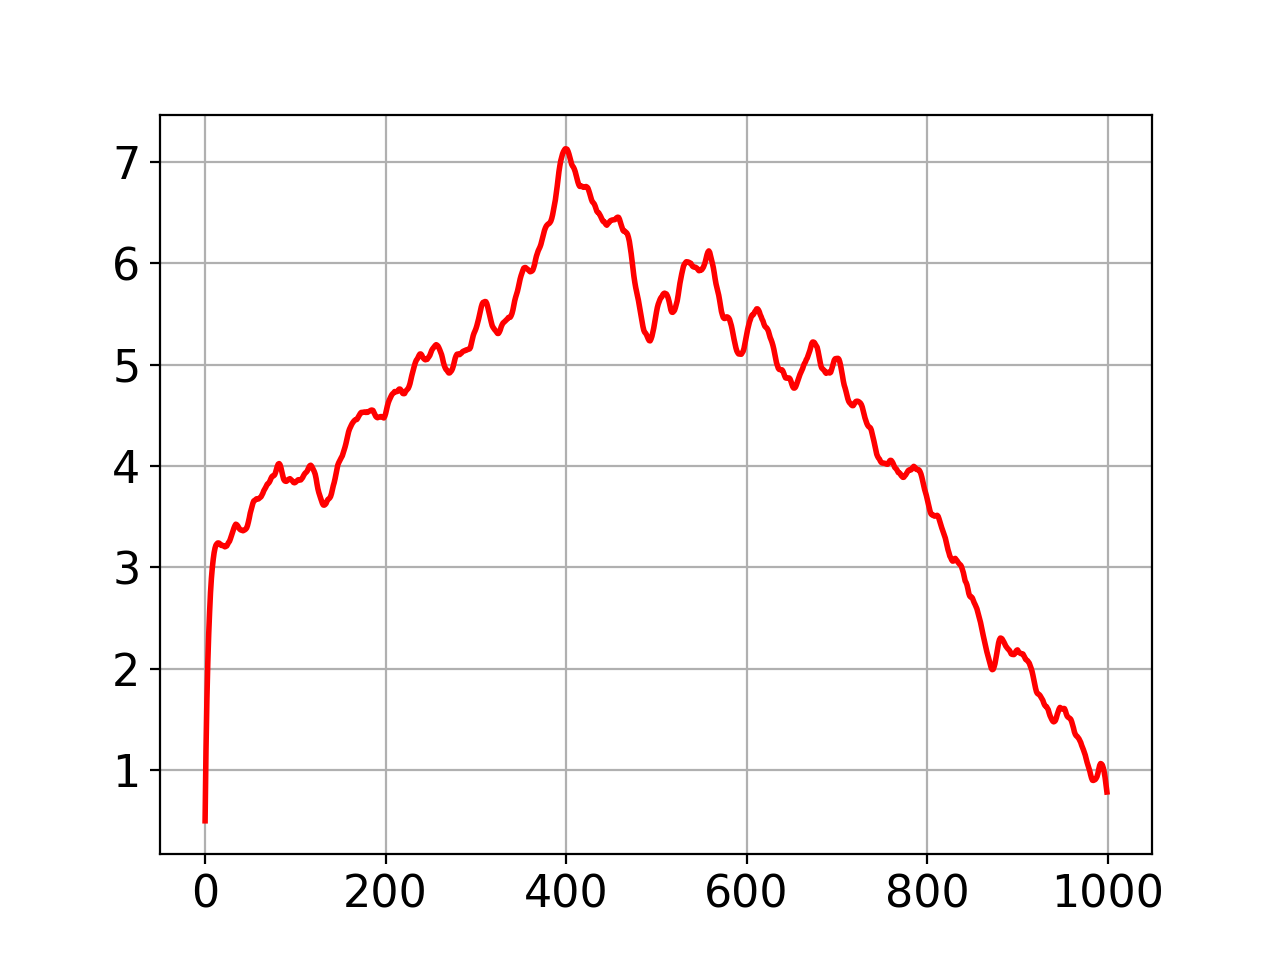

In [153]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau3, lw= 2, color="red")

*************2d**************

In [47]:
delta=2*d

energy4=[]
particles=startconf
for i in range (0,5000):
    accettanza[3]+=update(particles,delta,rc)
    dist=distanze(particles)
    energy4.append(Ee(particles,rc,dist)/N)

In [48]:
accettanza[3]/(N*M)

0.14127666666666666

In [49]:
for i in range(0,len(energy4)):
    energy4[i]+=DEtail

E_ave[3]=sum(energy4)/len(energy4)

print(E_ave[3])

c4=[]
M=5000
for k in range (0,400):
    boa=0
    for i in range (0,M-k):
        boa+=(energy4[i]-E_ave[3])*(energy4[i+k]-E_ave[3]);
    c4.append(boa/(M-k))

tau4=[]
boa=0.5
for j in range(1,400):
    boa+=c4[j]/c4[0]
    tau4.append(boa)



0.5742440977095741


<IPython.core.display.Javascript object>


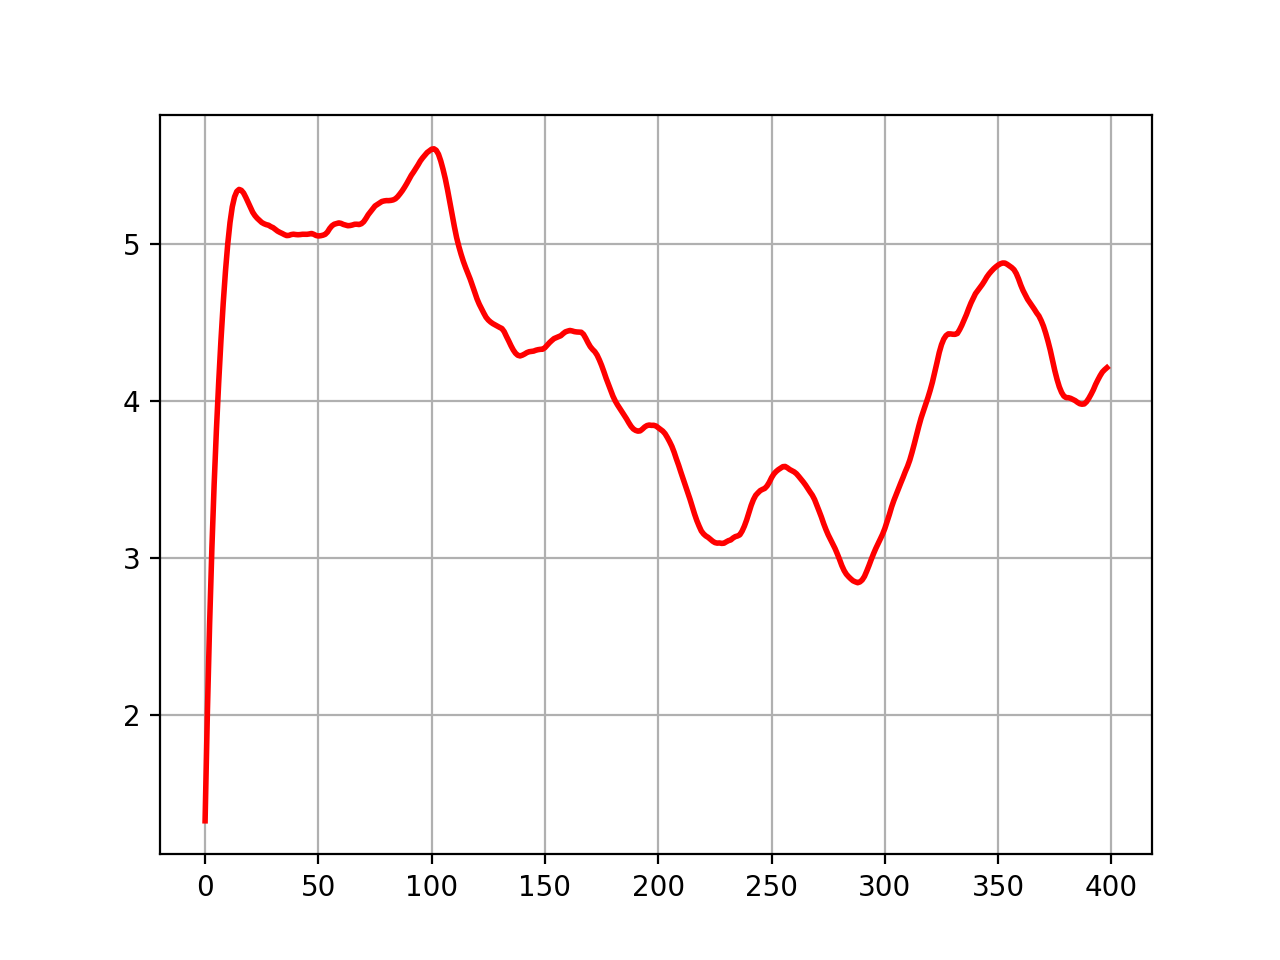

In [52]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau4, lw= 2, color="red")

*************3d*************

In [53]:
delta=3*d
energy5=[]
particles=startconf
for i in range (0,5000):
    accettanza[4]+=update(particles,delta,rc)
    dist=distanze(particles)
    energy5.append(Ee(particles,rc,dist)/N)

In [54]:
accettanza[4]/(N*M)

0.09090333333333334

In [55]:

for i in range (0,len(energy5)):
    energy5[i]+=DEtail

In [56]:

E_ave[4]=sum(energy5)/M

print(E_ave[4])

0.5753615095208153


In [57]:
c5=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy5[i]-E_ave[4])*(energy5[i+k]-E_ave[4]);
    c5.append(boa/(M-k))

tau5=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c5[j]/c5[0]
    tau5.append(boa+0.5)



<IPython.core.display.Javascript object>


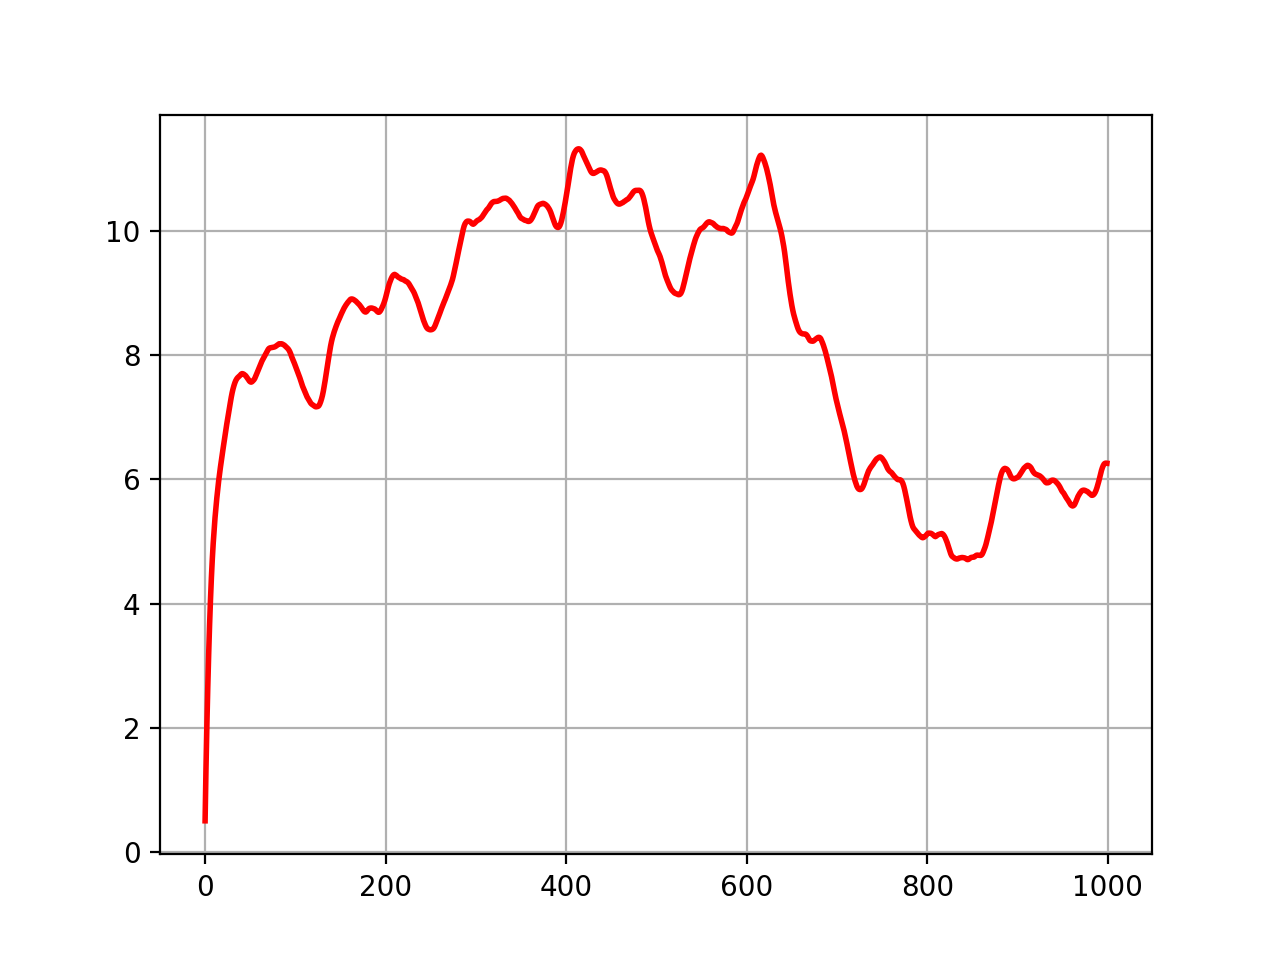

In [60]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau5, lw= 2, color="red")

***ERRORI***

In [122]:
E_err=[0,0,0,0,0,0]
tau=[43.3,17.5,5,5.12,8.1]

E_err[1]=(2*c1[0]*tau[0]/M)**0.5
E_err[2]=(2*c2[0]*tau[1]/M)**0.5
E_err[3]=(2*cftau3[0]*tau[2]/M)**0.5
E_err[4]=(2*c4[0]*tau[3]/M)**0.5
E_err[5]=(2*c5[0]*tau[4]/M)**0.5

In [123]:
c1[0]

0.0005245162011159814

In [124]:
E_err

[0,
 0.0030140704376853565,
 0.001921170959015426,
 0.0011215001201201101,
 0.001139691854126376,
 0.0013804822179060872]

In [63]:
errore=[
 0.02835026713282875,
 0.015743455947861876,
 0.008711984607663016,
 0.011471825541505465,
 0.012768838295498647]

In [64]:
E_ave

[0.5722772534312905,
 0.5747276059324605,
 0.5753548492042191,
 0.5742440977095741,
 0.5753615095208153]

In [65]:
axx=[0.7765,0.62451,0.304,0.141373,0.08945]

In [101]:
accettanza[2]*=N*M

In [66]:
for i in range(0,len(accettanza)):
    accettanza[i]/=(N*M)
accettanza

array([0.7767    , 0.62184667, 0.30395667, 0.14127667, 0.09090333])

In [171]:
E_err_plot

[0.0030140704376853565,
 0.001921170959015426,
 0.0011215001201201101,
 0.001139691854126376,
 0.0013804822179060872]

<IPython.core.display.Javascript object>


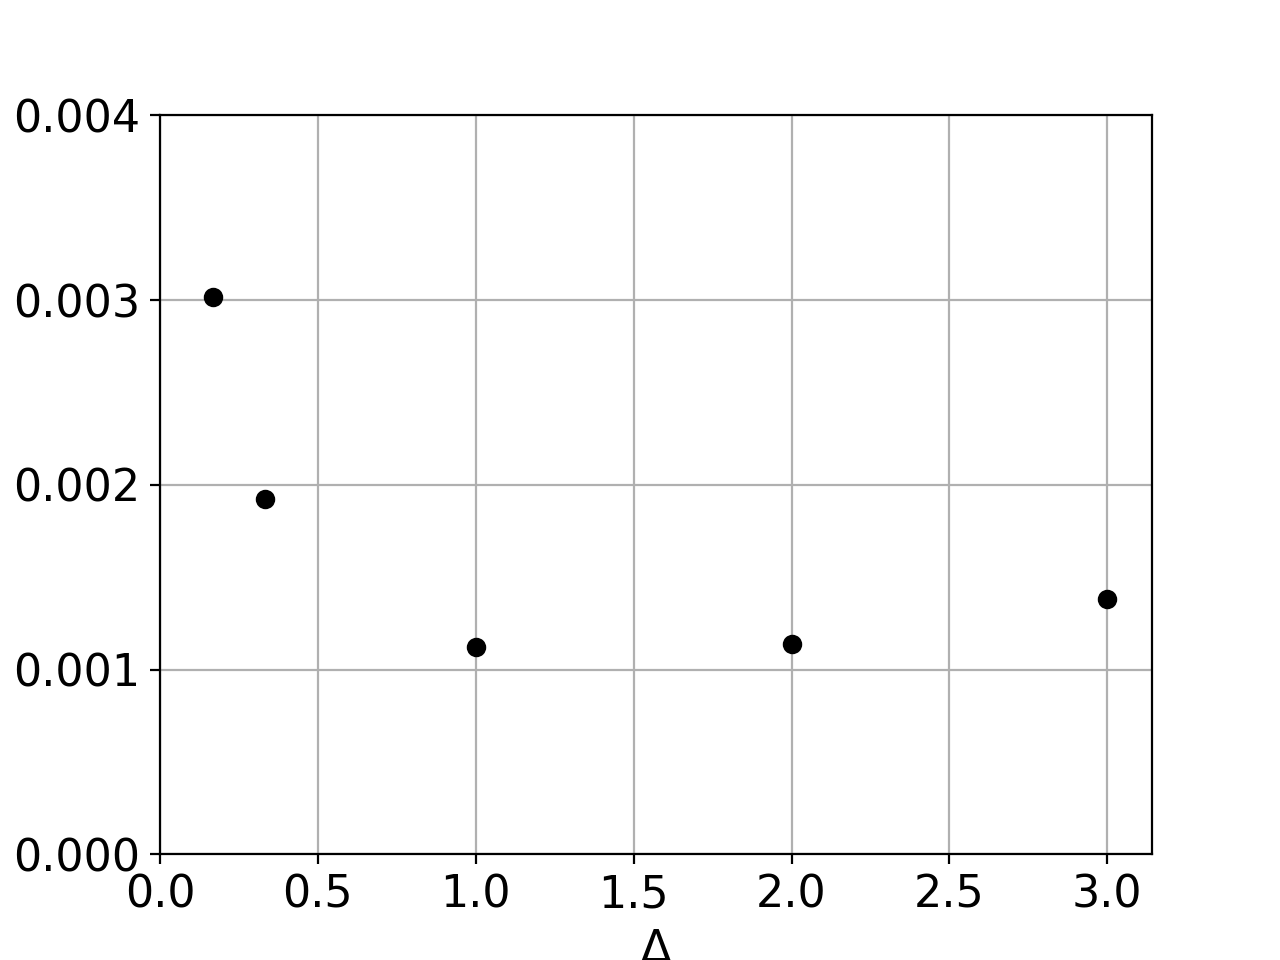

([<matplotlib.axis.YTick at 0x12d03cac8>,
 <a list of 5 Text yticklabel objects>)

In [136]:
E_err_plot=[]
for i in range (0,5):
    E_err_plot.append(E_err[i+1])
    
Delta=[1/6,1/3,1,2,3]

fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(Delta,E_err_plot, 'bo', color="black")

ax1.set_ylabel('$\Delta$', fontsize=16)
ax1.set_xlabel('$\Delta$', fontsize=16)

plt.xticks(np.arange(0,3.5,step=0.5))
plt.yticks(np.arange(0., 0.005, step=0.001))


# CUT OFF

<IPython.core.display.Javascript object>


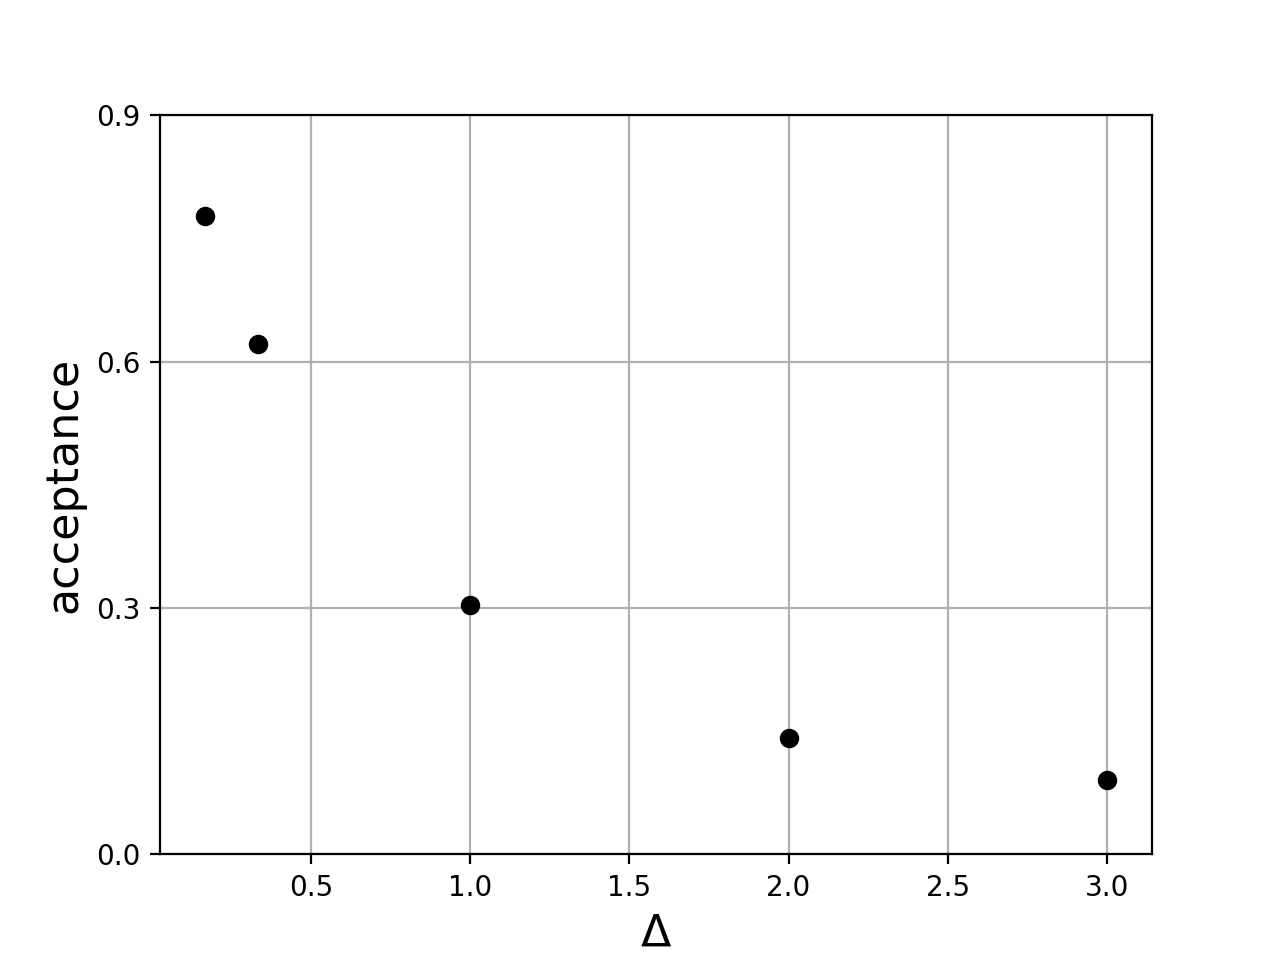

In [68]:
Delta=[1/6,1/3,1,2,3]

fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(Delta,accettanza, 'bo', color="black")


ax1.set_xlabel('$\Delta$', fontsize=16)
ax1.set_ylabel("acceptance",fontsize=16)
plt.yticks(np.arange(0,1,step=0.3))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.savefig("acceptance.png")

In [128]:
startconf

[array([30.35309105, 21.92915486, 38.76214803]),
 array([-39.23745181,  14.89188798,  13.43788438]),
 array([ 6.00248667, 36.49659709,  6.12747879]),
 array([42.5318466 , 14.51562054, 37.05726783]),
 array([-23.32722945, -17.62330535,  -9.75231015]),
 array([ 23.02296449,  40.75567624, -33.28917413]),
 array([110.39524868, -32.1764518 ,  12.90488815]),
 array([ -2.55334427,  -2.50349795, -12.65024243]),
 array([-16.81550881, -20.39096894,  12.94221274]),
 array([ 27.21903571, -25.82196898,  -9.22204843]),
 array([ 94.92158187, -30.02683733, -46.043321  ]),
 array([-2.50121062, 33.37770629,  0.3732833 ]),
 array([-21.92520352,  -7.66812508,  -9.26882094]),
 array([-19.53076796,   5.17836543,  58.46461802]),
 array([13.84063171, 56.12979063, 15.9878504 ]),
 array([22.07749857, 25.13399743,  7.69892649]),
 array([34.5423682 , 22.32082705, 45.85606458]),
 array([-19.29858753,  36.21403929,  45.51666935]),
 array([-38.82864945,  18.4225396 ,  33.49696116]),
 array([-61.54690955,   2.0436536

1770

# 3/8 cutoff

In [108]:
rc=3*L/8
M=5000

DEtail=math.pi*0.4/(3*rc**3)

DEtail

delta=d



In [109]:
DEtail

0.052954667432895765

In [71]:
energy1=[]
particles=startconf
for i in range (0,M):
    accettanza[1]+=update(particles,delta,rc)
    dist=distanze(particles)
    energy1.append(Ee(particles,rc,dist)/N)

In [72]:
accettanza[1]/(N*M)

0.3051887394888889

In [98]:
for i in range(0,len(energy1)):
    energy1[i]+=DEtail

E_ave[0]=sum(energy1)/len(energy1)

print(E_ave[0])

0.5711230165993472


In [110]:
0.57399395-DEtail #with

0.5210392825671042

In [74]:
c9=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy1[i]-E_ave[0])*(energy1[i+k]-E_ave[0]);
    c9.append(boa/(M-k))

tau9=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c9[j]/c9[0]
    tau9.append(boa+0.5)

<IPython.core.display.Javascript object>


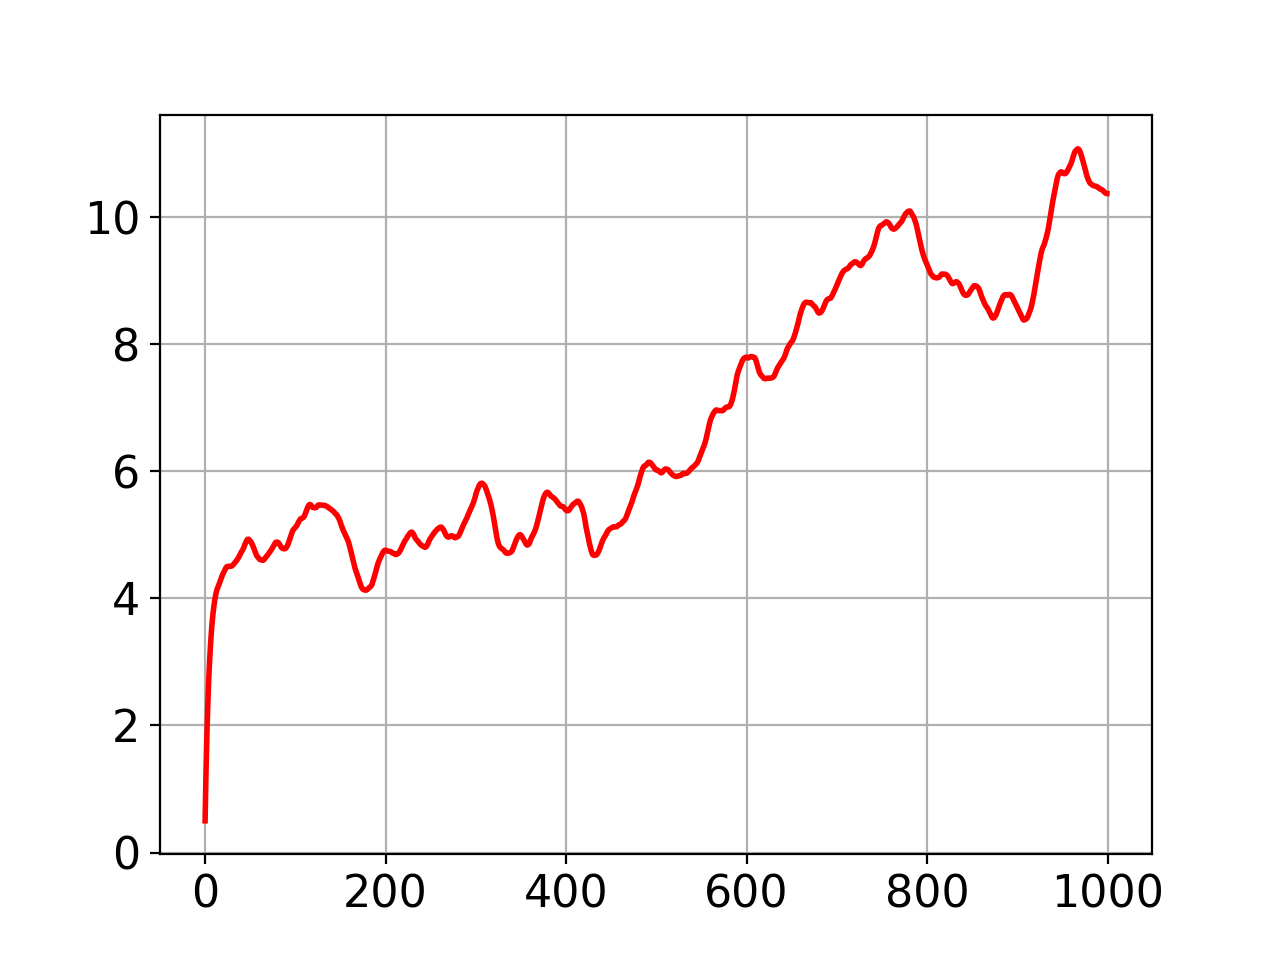

In [77]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau9, lw= 2, color="red")

In [137]:
E_err=(2*c9[0]*4.42/M)**0.5

In [138]:
E_err

0.0010169293765024368

In [177]:
rc=L/4
M=5000

In [178]:
DEtail=math.pi*0.4/(3*rc**3)

DEtail

0.1787220025860232

array([7.76700000e-01, 2.78203622e+05, 1.83181304e+05, 1.41276667e-01,
       9.09033333e-02])

In [181]:
dr=d/10
l=2*int(L/dr)
Npart=np.zeros(l)

accettanza[1]=0
energy15=[]
particles=startconf
for i in range (0,M):
    accettanza[1]+=update(particles,delta,rc)
    dist=distanze(particles)
    energy15.append(Ee(particles,rc,dist)/N)

In [183]:
accettanza[1]/(N*M)+0.305188739

0.6140120723333333

In [185]:
for i in range(0,len(energy1)):
    energy15[i]+=DEtail



0.39304698074849287


In [186]:
E_ave[0]=sum(energy15)/len(energy15)

print(E_ave[0])

0.5721924603319772


In [187]:
c10=[]
M=5000
for k in range (0,1000):
    boa=0
    for i in range (0,M-k):
        boa+=(energy15[i]-E_ave[0])*(energy15[i+k]-E_ave[0]);
    c10.append(boa/(M-k))

tau10=[]

for k in range(0,1000):
    boa=0
    for j in range(1,k+1):
        boa+=c10[j]/c10[0]
    tau10.append(boa+0.5)

<IPython.core.display.Javascript object>


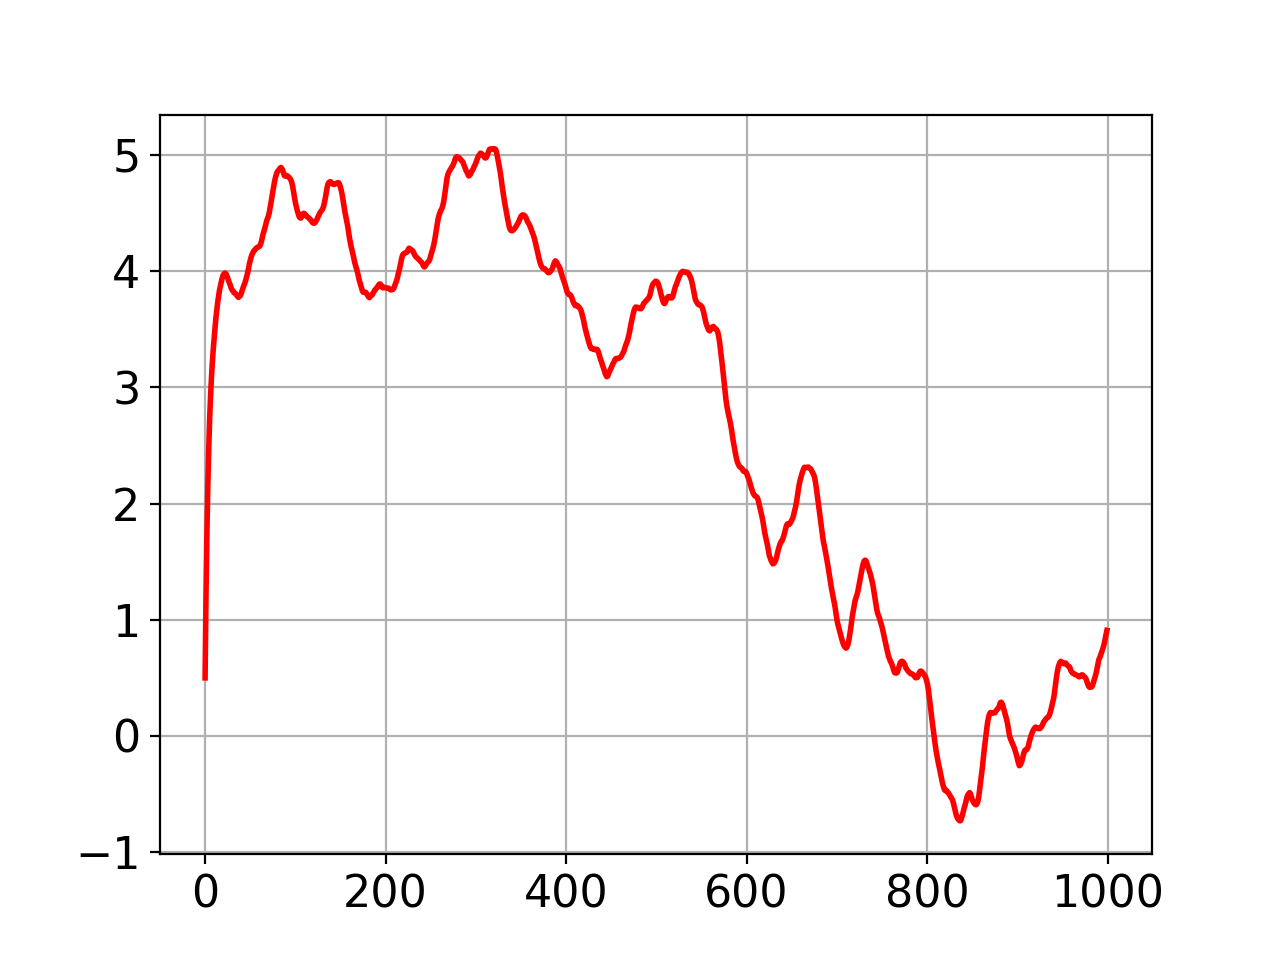

In [190]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.grid()
ax1.plot(tau10, lw= 2, color="red")

In [191]:
E_err=(2*c10[0]*4.12/M)**0.5

In [192]:
E_err

0.001095600097051578

In [94]:
for i in range(0,len(energy1)):
    energy1[i]-=DEtail

E_ave[0]=sum(energy1)/len(energy1)

print(E_ave[0])

0.392401014013324


In [97]:
E_ave[2]-0.022340

0.5530148492042191

In [167]:
for i in range(0,len(energy3)):
    energy3[i]+=DEtail

In [168]:
print(sum(energy3)/len(energy3))

0.7313377909526834


In [163]:
L

5.31329

In [169]:
DPtail

-0.01787220025860232